# Probability get serious

## Contents

* [Cumulative distribution function](#cdf)
* [Ninja training 6](#njt6) 

## Cumulative distribution function <a name=cdf></a>

Cumulative distribution function (CDF) of a RV $X$ evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$. 


$$F_X(x) = \mathbb{P}(X \leq x)$$

First let us consider the discrete case. Consider the possion distribution with pmf and intensity $\lambda$,

$$p_X(x) = \frac{\lambda^x e^{-\lambda}}{x!}$$

The possion distrubution is used to model the number of observation one sees in a interval of time or space.

For example, let $X$ be the number of cars observed between some time interval $\mathcal{T}$. Then may have a probability mass function,

$$p_X(x) = \frac{2^x e^{-2}}{x!}.$$ 

This a possion distribution with rate 2.

I have two question;
1. What is the probability one observes **exactly 3** cars in $\mathcal{T}$.
2. What is the probability one observes **at most 3** cars in $\mathcal{T}$.

The first question ok. It was covered in lesson three. We just need to evaluate the pmf at $x = 3$.
$$P_X(3) = \frac{2^3 e^{-2}}{3!} = \frac{8 e^{-2}}{6} = \frac{4 e^{-2}}{3}$$

We can check using python.

In [2]:
import numpy as np
print(4.0*np.exp(-2.0)/3.0)


from scipy.stats import poisson
poisson.pmf(3,mu=2)

0.1804470443154836


0.18044704431548356

For the second quantity we need to find this quantity

$$F_X(3) = \mathbb{P}(X \leq 3)$$

which is 
$$\mathbb{P}(X=0) +\mathbb{P}(X=1) + \mathbb{P}(X=2) + \mathbb{P}(X=3) $$

evaluating this we get 

$$ e^{-2} +2 e^{-2}+ 2 e^{-2}+\frac{4 e^{-2}}{3} = \frac{19 e^{-2}}{3}$$

We can check using python.

In [3]:
# The Expression we found
print(19*np.exp(-2)/3)


# Chech result in scipy
res = 0
for x in range(4):
    res += (2.0**x)*np.exp(-2.0)/np.math.factorial(x)
    
print(res)

print(poisson.cdf(3,mu=2))

0.857123460498547
0.8571234604985472
0.857123460498547


Now let us have an example for the continous case.

Let $M \sim \mathcal{N}(75,20)$ (that is normally distributed with mean 75 and variance 20). Here $M$ can model the score you will get on you exam.

A $\mathcal{N}(75,20)$ looks like this.

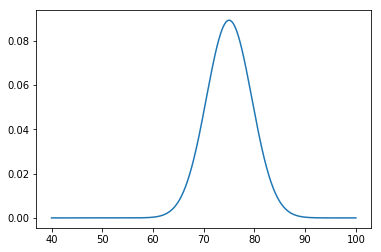

In [19]:
from scipy.stats import norm
import matplotlib.pyplot as plt
x=np.linspace(40,100,1000)
f = norm.pdf(x,loc=75,scale = np.sqrt(20))
plt.plot(x,f)
plt.show()

Recall, that because this is a continous RV we can't talk about probabilities at a single point. However, one can ask what is the probability one would get a score of 80 or higher.

Visually we are trying to find this probability.

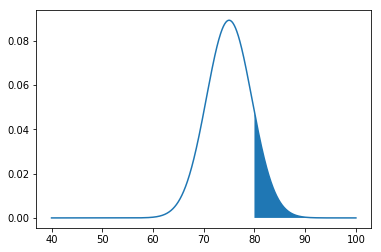

In [21]:
x_fill=np.linspace(80,100,1000)
f_fill = norm.pdf(x_fill,loc=75,scale = np.sqrt(20))
plt.plot(x,f)
plt.fill_between(x_fill,f_fill)
plt.show()

Mathematically we are trying to find $\mathbb{P}(X \geq 80)$.

But,

$\mathbb{P}(X \geq 80) = 1 - \mathbb{P}(X < 80) = 1 - F_X(80)$

Now the question is 'what is $F_X(80)$?'.

A $\mathcal{N}(\mu,\sigma^2)$ has the following density.

$$\frac{1}{\sqrt{2\pi \sigma^2}}e^{ - \left(\frac{x-\mu}{2\sigma^2}\right)}$$

Thus for our case,

$$ f_X(x) = \frac{1}{\sqrt{40\pi}}e^{ - \left(\frac{x-75}{40}\right)} $$

And so 

$$F_X(x) = \int_{-\infty}^{x}  \frac{1}{\sqrt{40\pi}}e^{ - \left(\frac{y-75}{40}\right)} dy $$

However, after studying a few years of intense calculas one finds that this integral cannot be evaluated analytically.

So to find to to find $F_X(80)$ just use scipy (It use numerical methods far beyond the scope of this course). 

In [28]:
norm.cdf(80,loc = 75,scale = np.sqrt(20))

0.8682237613585136

In [29]:
print(f'The probability one would get a score of 80 or higher is {1-norm.cdf(80,loc = 75,scale = np.sqrt(20))}')

The probability one would get a score of 80 or higher is 0.13177623864148635


## Ninja training 6 <a name="njt6"></a>

**Task 1:** Back in the day we did not have scipy to compute non-standard normal probabilities. People used z-tables. A Z-table displays the probabilities of a standard normal distribution. Recall a standard normal is a normal with a mean 0 and a variance 1. 

Let's say $X$ is a non-standard normal with mean $\mu$ and variance $\sigma^2$. We convert $X$ into a standard normal by applying the following transformation, 

$Z = \frac{X - \mu}{\sigma}.$


Now let $Y \sim \mathcal{N}(3,1.5)$. Find $\mathbb{P}(Y \leq 4)$ by transforming $Y$ into a standard normal. Confirm your answer with scipy and a Z-table. You may have to google 'how to use a Z-table'.